# Test of local Jupyter notebook
## Glen Langston,  21 September 13
### National Science Foundation

In [2]:
# this notebook opens a fits cube


In [3]:
from astropy.utils.data import download_file
from astropy.io import fits

horsehead_url = 'http://data.astropy.org/tutorials/FITS-images/HorseHead.fits'

#image_file is the path the downloaded and locally stashed file
image_file = download_file(horsehead_url, cache=True )
image_file

'/Users/glangsto/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents'

In [4]:
hdu_list = fits.open(image_file)
#hdu_list.info()

#save file under another name in the local directory: hh.fits
import os

if 'hh.fits' not in os.listdir():
    hdu_list.writeto('hh.fits')

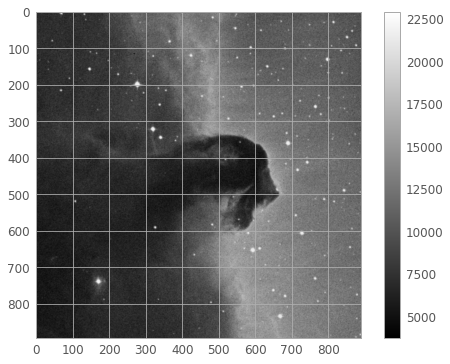

In [5]:
import matplotlib.pyplot as plt

#Nice styling
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

image_data = fits.getdata('hh.fits')

#Display the image
plt.imshow(image_data, cmap='gray')
plt.colorbar();

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 89 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 13.1 MB 875 kB/s eta 0:00:01
     |████████████████████████████████| 378 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 988 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 956 kB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 171 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 1.6 MB/s eta 0:00:01
  Created wheel for pyregion: filename=pyregion-2.1.1-cp39-cp39-macosx_10_14_x86_64.whl size=169091 sha256=2b1427cbc7ab8bbc51a55

INFO: Auto-setting vmin to  3.679e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.863e+04 [aplpy.core]


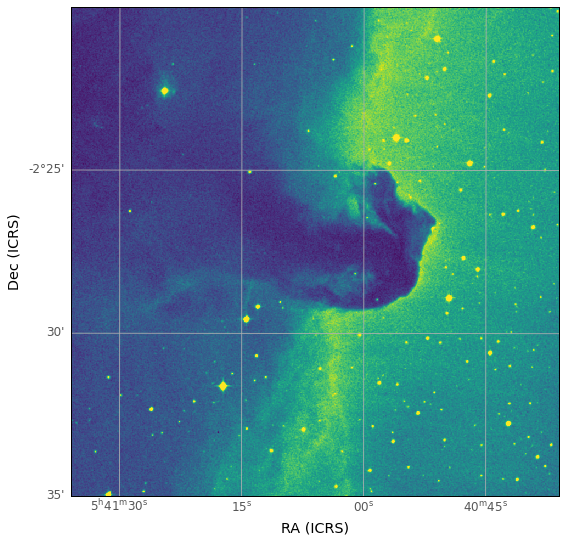

In [7]:
!pip install aplpy
import aplpy

hh = aplpy.FITSFigure('hh.fits')
hh.show_colorscale()

INFO: Auto-setting vmin to  3.725e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.881e+04 [aplpy.core]


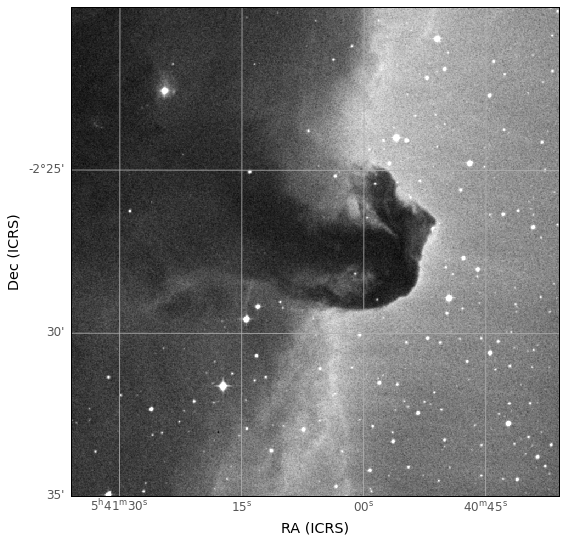

In [8]:
# Close the previous image session
hh.close()

hh = aplpy.FITSFigure('hh.fits')
hh.show_grayscale()

In [9]:
hh.close()

INFO: Auto-setting vmin to  3.598e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.938e+04 [aplpy.core]


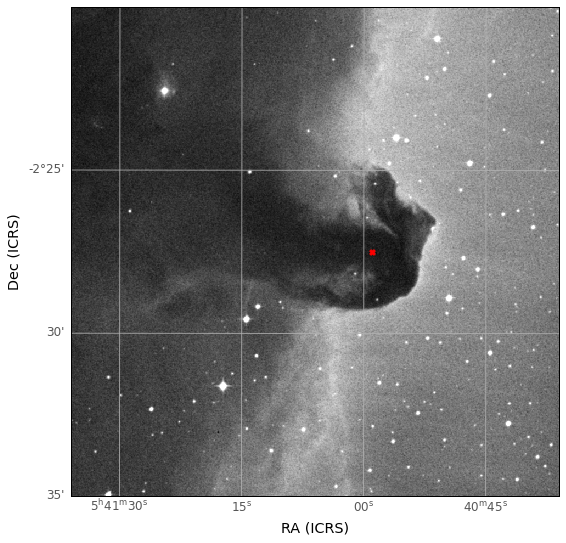

In [13]:
from astropy import coordinates

hh = aplpy.FITSFigure('hh.fits')
hh.show_grayscale()

# We can lookup data for astronomical objects by name
HORSEHEAD_NEBULA = 'Horsehead Nebula'

horsehead = coordinates.SkyCoord.from_name(HORSEHEAD_NEBULA)
hh.show_markers(horsehead.ra.deg, horsehead.dec.deg, marker='X', c='red')

In [14]:
from astroquery.simbad import Simbad

result_table = Simbad.query_object("Horsehead nebula")

result_table.to_pandas().T

,0
MAIN_ID,NAME Horsehead Nebula
RA,05 40 59.0
DEC,-02 27 30
RA_PREC,5
DEC_PREC,5
COO_ERR_MAJA,NaN
COO_ERR_MINA,NaN
COO_ERR_ANGLE,0
COO_QUAL,D
COO_WAVELENGTH,


In [15]:
from astroquery.skyview import SkyView

hh2_images = SkyView.get_images(position=HORSEHEAD_NEBULA,
                                survey=['2MASS-K'], pixels=1500)

hh2_images

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x148d5abb0>]]